# Improved Bellman-Ford algorithm with Maximum Violation Permutation problem

## Authors: LUONG Ethan, PHAM Louis-Antoine

This project aims to improve Bellman-Ford algorithm's running times by using a specific order to traverse the vertices of a given graph.

In order to determine the said order, we use a greedy algorithm that successively seeks the sources, the targets, and the vertice with the largest gap in number between its successors and its ancestors, while there is still a node to study.

In [1]:
from src.Graph import Graph
from src.utils import generate_random_test_set, generate_levelled_test_set
import matplotlib.pyplot as plt
import numpy as np
import random
import time

%load_ext autoreload
%autoreload 2

random.seed(123)

### 1. Bellman-Ford Algorithm

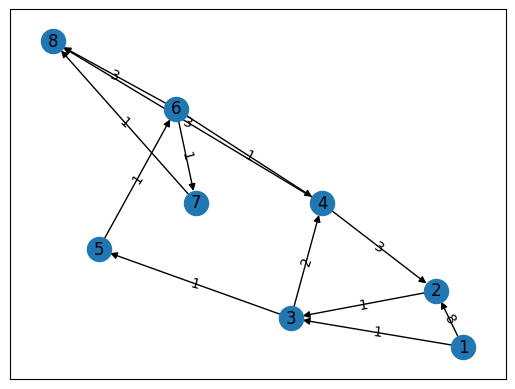

In [2]:
nodes = range(1, 9)
edges = [(1,2,{'weight':8}), (1,3,{'weight':1}), (2,3,{'weight':1}), (3,4,{'weight':2}), (3,5,{'weight':1}), (4,2,{'weight':3}), (4,8,{'weight':3}), (5,6,{'weight':1}), (6,4,{'weight':1}), (6,7,{'weight':1}), (6,8,{'weight':3}), (7,8,{'weight':1})]
G1 = Graph(nodes, edges)
G1.display()

Number of iterations: 3


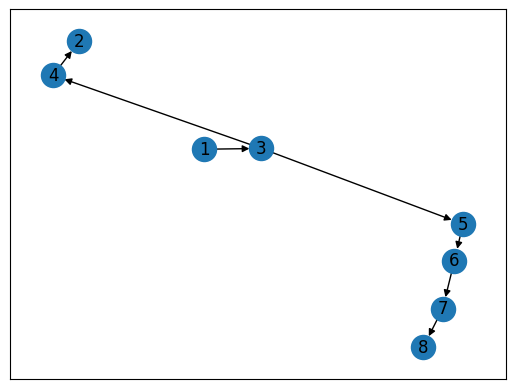

In [3]:
shortest_paths_graph, n_iterations = G1.compute_shortest_paths(1)
print(f'Number of iterations: {n_iterations}')
shortest_paths_graph.display()

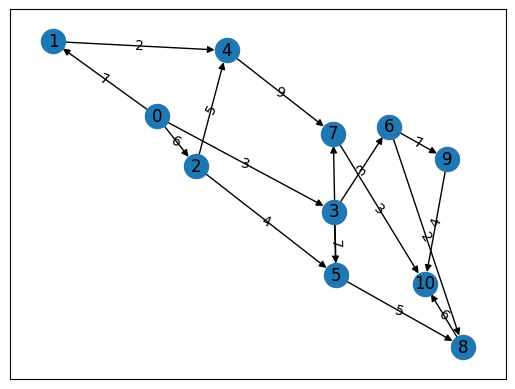

In [4]:
nodes = range(0, 11)
edges = [(0,1,{'weight':7}), (0,2,{'weight':6}), (0,3,{'weight':3}), (1,4,{'weight':2}), (2,4,{'weight':5}), (2,5,{'weight':4}), (3,5,{'weight':7}), (3,6,{'weight':3}), (4,7,{'weight':9}), (5,7,{'weight':2}), (5,8,{'weight':5}), (6,8,{'weight':2}), (6,9,{'weight':7}), (7,10,{'weight':3}), (8,10,{'weight':6}), (9,10,{'weight':4})]
G2 = Graph(nodes, edges)
G2.display()

Number of iterations: 3


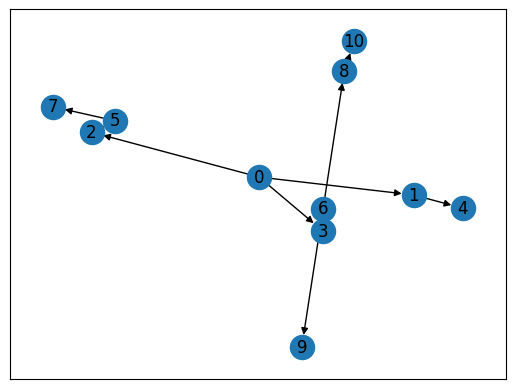

In [5]:
shortest_paths_graph, n_iterations = G2.compute_shortest_paths(0)
print(f'Number of iterations: {n_iterations}')
shortest_paths_graph.display()

### 2. Greedy Algorithm: GloutonFas

In [6]:
print(f'Order: {shortest_paths_graph.glouton_fas()}')

Order: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Order: [4, 6, 5, 8, 7, 1, 2, 3]


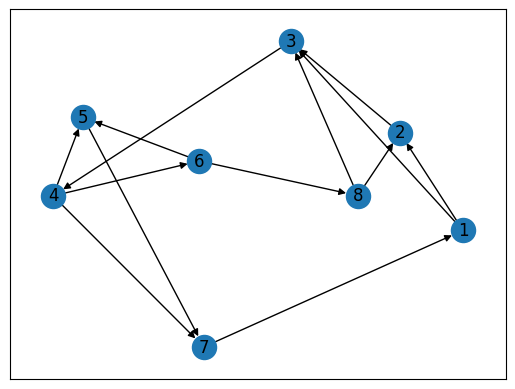

In [7]:
G2 = Graph(range(1,9), [(1,2), (1,3), (2,3), (3,4), (4,5), (4,6), (4,7), (5,7), (6,5), (6,8), (7,1), (8,2), (8,3)])
G2.display()
print(f'Order: {G2.glouton_fas()}')

### 3. Random Test Graphs Generation

We focus on creating a random graph G. From it, we should derivate 4 weighted graphs G1, G2, G3, H whose weights are randomly picked.

For us to get relevant testing data, we decided to generate G as a directed acyclic graph (DAG).

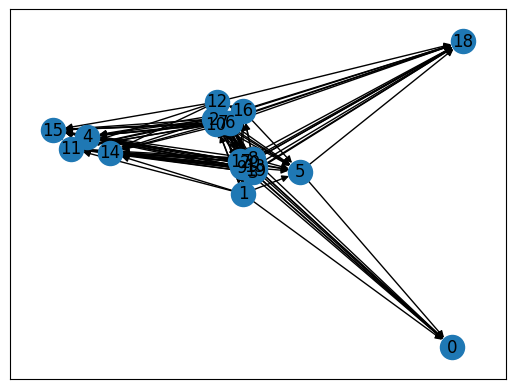

In [8]:
G, weighted_graphs = generate_random_test_set(n_instances=4, n_nodes=21, weight_min=-10, weight_max=10, p_edge=0.8, mode='acyclic')
G.display()

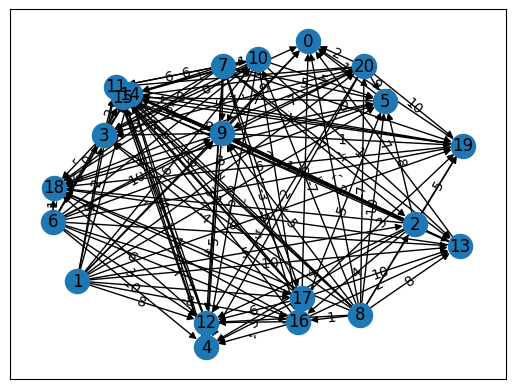

In [9]:
H = weighted_graphs[-1]
H.display()

### 4. Shortest Paths Union T

Source: 8
Out degree: 15
|V|//2 = 10


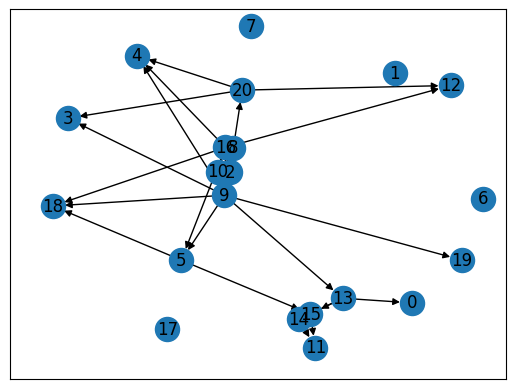

In [10]:
s = G.choose_source()
print(f'Source: {s}\nOut degree: {G.out_degree(s)}\n|V|//2 = {len(G.nodes)//2}')
shortest_paths = [graph.compute_shortest_paths(s)[0] for graph in weighted_graphs[:-1]]
T = Graph.union(shortest_paths)
T.display()

### 5. Testing the Greedy Algorithm on T

In [11]:
ordered_nodes = T.glouton_fas()
print(f'Order: {ordered_nodes}')

Order: [1, 6, 7, 8, 17, 2, 10, 20, 9, 16, 3, 13, 19, 4, 5, 12, 0, 14, 15, 18, 11]


### 6. Improved Bellman-Ford

Number of iterations: 1


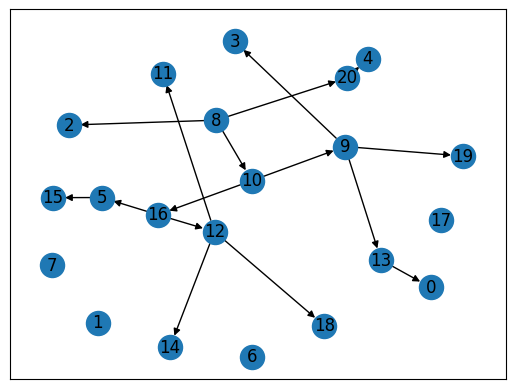

In [12]:
shortest_paths_graph, n_iterations_greedy = H.compute_shortest_paths(s, ordered_nodes)
print(f'Number of iterations: {n_iterations_greedy}')
shortest_paths_graph.display()

### 7. Classic Bellman-Ford Application on H

Number of iterations: 3


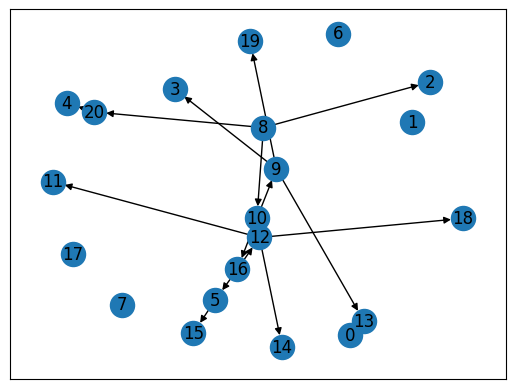

In [13]:
shortest_paths_graph, n_iterations_classic = H.compute_shortest_paths(s)
print(f'Number of iterations: {n_iterations_classic}')
shortest_paths_graph.display()

### 8. Comparison with and without Pretreatment

In [14]:
if n_iterations_greedy < n_iterations_classic:
    print(f'The greedy algorithm allows to converge faster ({n_iterations_greedy} < {n_iterations_classic})')
elif n_iterations_greedy == n_iterations_classic:
    print(f'The numbers of iterations are the same ({n_iterations_greedy} = {n_iterations_classic})')
else:
    print(f'The greedy algorithm takes longer to converge ({n_iterations_greedy} > {n_iterations_classic})')

The greedy algorithm allows to converge faster (1 < 3)


### 9. Large-Scale Comparisons

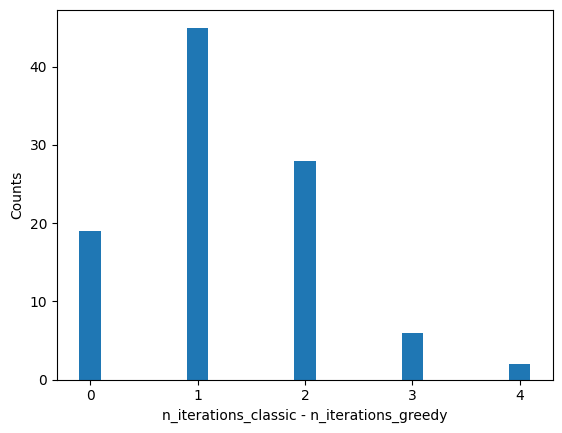

In [15]:
gaps = []

for _ in range(100):
    G, weighted_graphs = generate_random_test_set(n_instances=4, n_nodes=50, weight_min=-10, weight_max=10, p_edge=0.8, mode='acyclic')
    H = weighted_graphs[-1]
    s = G.choose_source()
    shortest_paths = [graph.compute_shortest_paths(s)[0] for graph in weighted_graphs[:-1]]
    T = Graph.union(shortest_paths)
    ordered_nodes = T.glouton_fas()
    shortest_paths_graph, n_iterations_greedy = H.compute_shortest_paths(s, ordered_nodes)
    shortest_paths_graph, n_iterations_classic = H.compute_shortest_paths(s)
    gaps.append(n_iterations_classic - n_iterations_greedy)

gaps = np.array(gaps)

plt.figure()
labels, counts = np.unique(gaps, return_counts=True)
plt.bar(labels, counts, align='center', width=0.2)
plt.gca().set_xticks(labels)
plt.xlabel('n_iterations_classic - n_iterations_greedy')
plt.xticks([k for k in np.unique(gaps)])
plt.ylabel('Counts')
plt.show()

### 10. Performances and n_instances

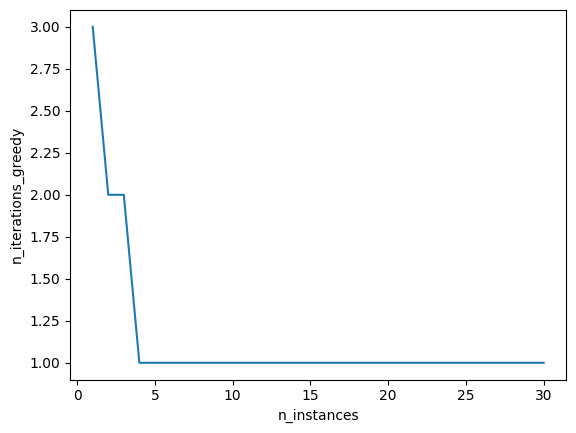

In [16]:
G, weighted_graphs = generate_random_test_set(n_instances=31, n_nodes=100, weight_min=-1000, weight_max=1000, p_edge=0.8, mode='acyclic')
s = G.choose_source()

H = weighted_graphs[-1]

x = []
y = []

for n in range(1, 31):
    shortest_paths = [graph.compute_shortest_paths(s)[0] for graph in weighted_graphs[:n]]
    T = Graph.union(shortest_paths)
    ordered_nodes = T.glouton_fas()
    shortest_paths_graph, n_iterations_greedy = H.compute_shortest_paths(s, ordered_nodes)
    x.append(n)
    y.append(n_iterations_greedy)

plt.figure()
plt.plot(x, y)
plt.xlabel('n_instances')
plt.ylabel('n_iterations_greedy')
plt.show()

### 11. Case Study

Let G = (V,E) be a graph with 2500 levels and 4 vertices per level. We assume that all vertices of a level j are connected to all the vertices of the next level j+1, with j in [1, 2499].

The weights are integers randomly chosen between -10 and 10 with a discrete uniform distribution on this interval.

In [17]:
G, weighted_graphs = generate_levelled_test_set(n_instances=4, n_levels=2500, n_nodes_per_level=4, weight_min=-10, weight_max=10)
s = G.choose_source()
H = weighted_graphs[-1]

start_time = time.time()
shortest_paths_graph, n_iterations_classic = H.compute_shortest_paths(s)
end_time = time.time()

running_time_classic = end_time - start_time
print(f'Number of iterations (Classic): {n_iterations_classic}')
print(f'Running time (Classic): {running_time_classic:.2f}s')

start_time = time.time()
shortest_paths = [graph.compute_shortest_paths(s)[0] for graph in weighted_graphs[:n]]
T = Graph.union(shortest_paths)
end_time = time.time()

learning_time = end_time - start_time
print(f'Learning time: {learning_time:.2f}s')

start_time = time.time()
ordered_nodes = T.glouton_fas()
shortest_paths_graph, n_iterations_greedy = H.compute_shortest_paths(s, ordered_nodes)
end_time = time.time()

running_time_greedy = end_time - start_time
print(f'Number of iterations (Greedy): {n_iterations_greedy}')
print(f'Running time (Greedy): {running_time_greedy:.2f}s')

Number of iterations (Classic): 1198
Running time (Classic): 70.69s
Learning time: 330.53s
Number of iterations (Greedy): 1
Running time (Greedy): 8.88s
